In [87]:
# !pip uninstall numpy -y
# !pip uninstall scikit-learn-extra -y
# !pip install numpy==1.24.4  # Install a compatible NumPy version
# !pip install scikit-learn-extra

In [88]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Load Data

In [89]:
PATH = "/content/drive/MyDrive/1 Serba Serbi Kuliah/Lomba/SMATIC/2025"

In [90]:
import pandas as pd

df = pd.read_excel(PATH + "/Data soal_Olimstat SMATIC 6.0.xlsx")
df.head()

,id_responden,Pajanan_Teknologi_Pendidikan,Partisipasi_Seni_Olahraga,Indeks_Kematangan_Karakter,Indeks_Gizi_Seimbang,Skor_Kognitif_Terstandarisasi,Kualitas_Interaksi_OrangTua,Iklim_Belajar_Sekolah
0,1,9.20,1,86.32,7.20,77.46,9.10,6.60
1,2,9.40,1,73.41,4.10,77.90,6.00,6.40
2,3,3.60,0,72.17,4.10,56.74,8.80,3.90
3,4,8.50,1,71.87,5.40,77.64,5.40,5.60
4,5,6.80,0,80.16,9.60,93.67,3.10,9.20


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id_responden                   100 non-null    int64  
 1   Pajanan_Teknologi_Pendidikan   100 non-null    float64
 2   Partisipasi_Seni_Olahraga      100 non-null    int64  
 3   Indeks_Kematangan_Karakter     100 non-null    float64
 4   Indeks_Gizi_Seimbang           100 non-null    float64
 5   Skor_Kognitif_Terstandarisasi  100 non-null    float64
 6   Kualitas_Interaksi_OrangTua    100 non-null    float64
 7   Iklim_Belajar_Sekolah          100 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 6.4 KB


In [92]:
Y1_IQ = 'Skor_Kognitif_Terstandarisasi'
Y2_EQ = 'Indeks_Kematangan_Karakter'

# Korelasi

Correlation Matrix:
                               Skor_Kognitif_Terstandarisasi  Indeks_Kematangan_Karakter
Skor_Kognitif_Terstandarisasi                           1.00                        0.65
Indeks_Kematangan_Karakter                              0.65                        1.00


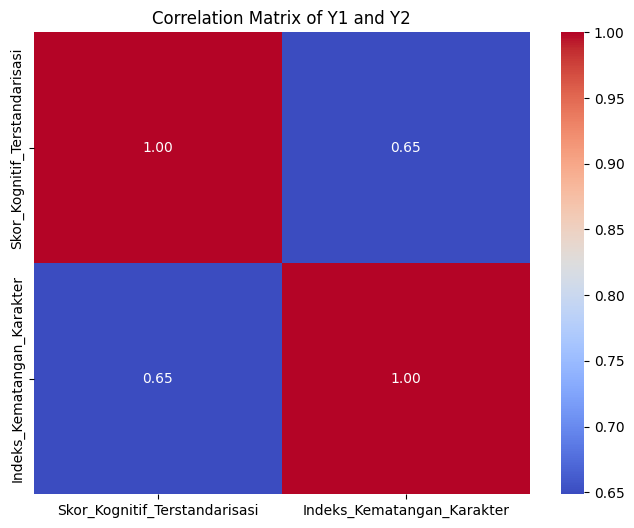

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix for Y1 and Y2
correlation_matrix = df[[Y1_IQ, Y2_EQ]].corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Y1 and Y2')
plt.show()

In [94]:
!pip install factor-analyzer

In [95]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
import numpy as np

# Select the variables for Bartlett's test
data_for_bartlett = df[[Y1_IQ, Y2_EQ]].dropna() # Drop rows with NaN values if any

# Perform Bartlett's test of sphericity
chi_square_value, p_value_bartlett = calculate_bartlett_sphericity(data_for_bartlett)

print(f"\nBartlett's Test of Sphericity:")
print(f"Chi-square value: {chi_square_value:.4f}")
print(f"P-value: {p_value_bartlett:.4f}")

# Interpret the results (using a significance level of 0.05)
alpha = 0.05
if p_value_bartlett < alpha:
    print(f"Since the p-value ({p_value_bartlett:.4f}) is less than alpha ({alpha}), we reject the null hypothesis.")
    print("The variables are correlated enough to proceed with factor analysis.")
else:
    print(f"Since the p-value ({p_value_bartlett:.4f}) is greater than or equal to alpha ({alpha}), we fail to reject the null hypothesis.")
    print("The variables are not sufficiently correlated for factor analysis.")


Bartlett's Test of Sphericity:
Chi-square value: 53.2170
P-value: 0.0000
Since the p-value (0.0000) is less than alpha (0.05), we reject the null hypothesis.
The variables are correlated enough to proceed with factor analysis.


In [96]:
from scipy.stats import pearsonr

# Calculate the Pearson correlation coefficient and the p-value
correlation_coefficient, p_value = pearsonr(df[Y1_IQ], df[Y2_EQ])

print(f"\nPearson Correlation Coefficient between {Y1_IQ} and {Y2_EQ}: {correlation_coefficient:.4f}")
print(f"P-value for testing non-correlation: {p_value:.4f}")

# Interpret the results (using a significance level of 0.05)
alpha = 0.05
if p_value < alpha:
    print(f"Since the p-value ({p_value:.4f}) is less than alpha ({alpha}), we reject the null hypothesis.")
    print(f"There is a statistically significant correlation between {Y1_IQ} and {Y2_EQ}.")
else:
    print(f"Since the p-value ({p_value:.4f}) is greater than or equal to alpha ({alpha}), we fail to reject the null hypothesis.")
    print(f"There is no statistically significant correlation between {Y1_IQ} and {Y2_EQ}.")



Pearson Correlation Coefficient between Skor_Kognitif_Terstandarisasi and Indeks_Kematangan_Karakter: 0.6486
P-value for testing non-correlation: 0.0000
Since the p-value (0.0000) is less than alpha (0.05), we reject the null hypothesis.
There is a statistically significant correlation between Skor_Kognitif_Terstandarisasi and Indeks_Kematangan_Karakter.


# Multivariate Regression

## Langkah 1: Uji Normalitas Variabel Respon secara Multivariat

In [97]:
from scipy.stats import shapiro
import pandas as pd

respon = df[[Y1_IQ, Y2_EQ]]

# Uji normalitas univariat untuk masing-masing
for col in respon.columns:
    stat, p = shapiro(respon[col])
    print(f"{col} → Shapiro-Wilk stat={stat:.4f}, p={p:.4f}")

# uji normalitas dengan jarque berra
from scipy.stats import jarque_bera
for col in respon.columns:
    stat, p = jarque_bera(respon[col])
    print(f"{col} → Jarque-Bera stat={stat:.4f}, p={p:.4f}")

Skor_Kognitif_Terstandarisasi → Shapiro-Wilk stat=0.9893, p=0.6087
Indeks_Kematangan_Karakter → Shapiro-Wilk stat=0.9922, p=0.8349
Skor_Kognitif_Terstandarisasi → Jarque-Bera stat=1.1812, p=0.5540
Indeks_Kematangan_Karakter → Jarque-Bera stat=0.0259, p=0.9871


In [98]:
!pip install pingouin

In [99]:
from pingouin import multivariate_normality

mvn_stat, mvn_p, mvn_bic = multivariate_normality(respon, alpha=0.05)
print(f"Multivariate normality test p-value = {mvn_p}")

Multivariate normality test p-value = 0.6552273449450658


## Langkah 2: Uji signifikansi Korelasi antar Variabel Respon (Bartlett Test)

In [100]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

# Bartlett test
chi_square_value, p_value = calculate_bartlett_sphericity(respon)
print(f"Bartlett's Test → Chi-Square: {chi_square_value:.4f}, p-value: {p_value:.4f}")

Bartlett's Test → Chi-Square: 53.2170, p-value: 0.0000


## Langkah 3: Deteksi Multikolinearitas dengan VIF

In [101]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = df.drop(['id_responden', Y1_IQ, Y2_EQ], axis=1)

vif_df = pd.DataFrame()
vif_df["Variable"] = X.columns
vif_df["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_df)

                       Variable  VIF
0  Pajanan_Teknologi_Pendidikan 5.26
1     Partisipasi_Seni_Olahraga 2.95
2          Indeks_Gizi_Seimbang 6.63
3   Kualitas_Interaksi_OrangTua 5.55
4         Iklim_Belajar_Sekolah 9.40


In [102]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

r2_scores = {}
vif_columns = X.columns
for i in range(len(vif_columns)):
    target_variable = vif_columns[i]
    independent_variables = [col for j, col in enumerate(vif_columns) if i != j]

    X = df[independent_variables]
    y = df[target_variable]

    X = X.dropna()
    y = y.loc[X.index]

    if not X.empty:
        model = LinearRegression()
        model.fit(X, y)
        y_pred = model.predict(X)
        r2 = r2_score(y, y_pred)
        r2_scores[f'{target_variable}'] = r2
    else:
        r2_scores[f'{target_variable}'] = np.nan


# Print the calculated VIF values dalam tabel
for variable, r2 in r2_scores.items():
    # print(f"R^2 for {variable}: {r2:.4f}")
    print(f"VIF for {variable}: {1/(1-r2):.4f}")

VIF for Pajanan_Teknologi_Pendidikan: 1.0488
VIF for Partisipasi_Seni_Olahraga: 1.0471
VIF for Indeks_Gizi_Seimbang: 1.0186
VIF for Kualitas_Interaksi_OrangTua: 1.0342
VIF for Iklim_Belajar_Sekolah: 1.0208


## Langkah 4: Analisis Korelasi Visual (Scatterplot) dan Numerik

                               Skor_Kognitif_Terstandarisasi  Indeks_Kematangan_Karakter
Skor_Kognitif_Terstandarisasi                           1.00                        0.65
Indeks_Kematangan_Karakter                              0.65                        1.00


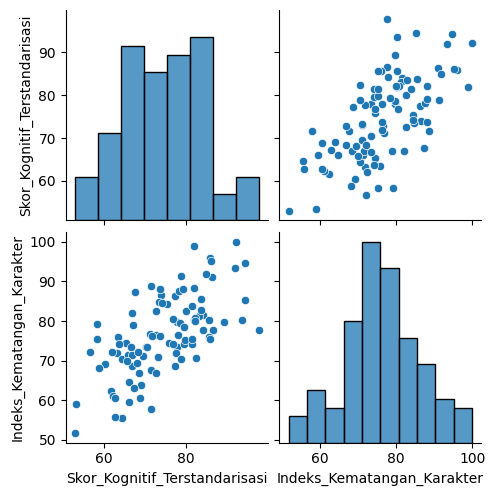

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt

# Korelasi numerik
print(df[[Y1_IQ,Y2_EQ]].corr())

# Scatterplot matrix
sns.pairplot(df[[Y1_IQ,Y2_EQ]])
plt.show()

                               Pajanan_Teknologi_Pendidikan  Partisipasi_Seni_Olahraga  Indeks_Kematangan_Karakter  Indeks_Gizi_Seimbang  Skor_Kognitif_Terstandarisasi  Kualitas_Interaksi_OrangTua  Iklim_Belajar_Sekolah
Pajanan_Teknologi_Pendidikan                           1.00                       0.19                        0.21                 -0.04                           0.59                         0.10                   0.06
Partisipasi_Seni_Olahraga                              0.19                       1.00                        0.23                  0.03                           0.04                        -0.01                   0.10
Indeks_Kematangan_Karakter                             0.21                       0.23                        1.00                  0.17                           0.65                         0.49                   0.51
Indeks_Gizi_Seimbang                                  -0.04                       0.03                        0.17      

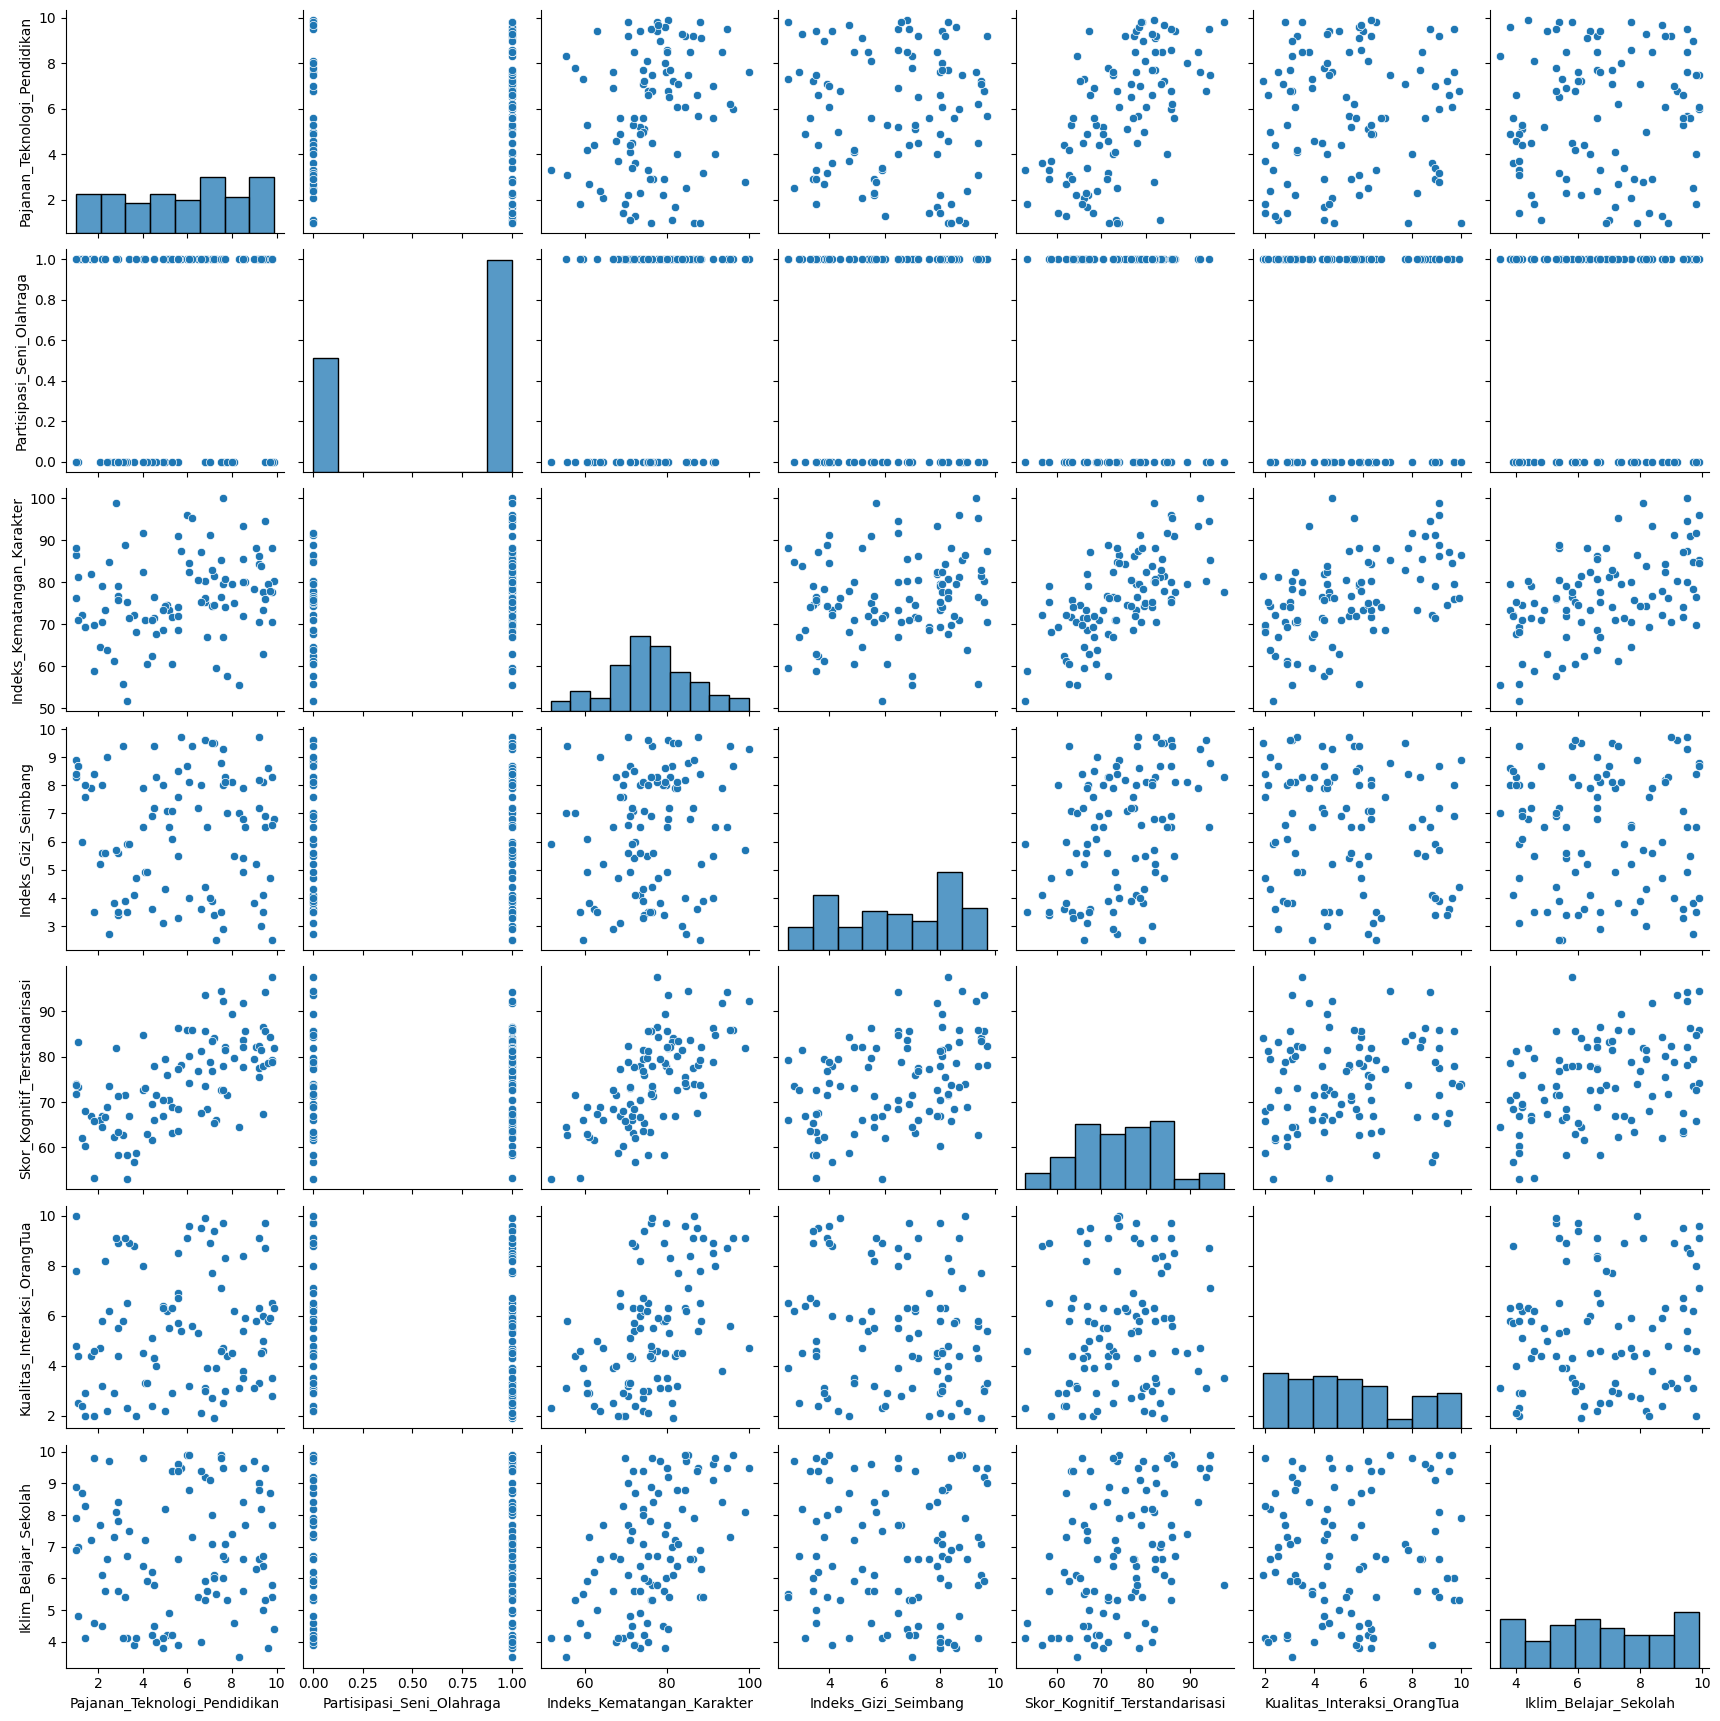

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt

# Korelasi numerik
print(df.drop(['id_responden'], axis=1).corr())

# Scatterplot matrix
sns.pairplot(df.drop(['id_responden'], axis=1))
plt.show()

## Langkah 5: Multivariate Regression

In [105]:
import statsmodels.api as sm

# Define the independent variables (features)
# Assuming all columns in df except Y1_IQ and Y2_EQ are independent variables
X = df.drop(['id_responden', Y1_IQ, Y2_EQ], axis=1)

# Add a constant to the independent variables matrix
X = sm.add_constant(X)

# Define the dependent variables (targets)
Y = df[[Y1_IQ, Y2_EQ]]

# Fit the multivariate regression model
model_Y1 = sm.OLS(Y[Y1_IQ], X).fit()
model_Y2 = sm.OLS(Y[Y2_EQ], X).fit()

# Print the summaries of the models
print("Multivariate Regression Results for Y1 (Skor_Kognitif_Terstandarisasi):")
print(model_Y1.summary())

print("\nMultivariate Regression Results for Y2 (Indeks_Kematangan_Karakter):")
print(model_Y2.summary())

Multivariate Regression Results for Y1 (Skor_Kognitif_Terstandarisasi):
                                  OLS Regression Results                                 
Dep. Variable:     Skor_Kognitif_Terstandarisasi   R-squared:                       0.684
Model:                                       OLS   Adj. R-squared:                  0.668
Method:                            Least Squares   F-statistic:                     40.78
Date:                           Sat, 05 Jul 2025   Prob (F-statistic):           4.14e-22
Time:                                   03:31:14   Log-Likelihood:                -310.97
No. Observations:                            100   AIC:                             633.9
Df Residuals:                                 94   BIC:                             649.6
Df Model:                                      5                                         
Covariance Type:                       nonrobust                                         
                            

## Langkah 6: Uji Signifikansi Parameter Regresi Serentak dan Parsial

In [106]:
# Signifikansi parsial sudah otomatis ada di .summary() dari model OLS di atas
# Untuk uji serentak → gunakan MANOVA

from statsmodels.multivariate.manova import MANOVA

# Define the independent variables (features) and dependent variables (targets)
independent_vars = ['Pajanan_Teknologi_Pendidikan', 'Partisipasi_Seni_Olahraga', 'Indeks_Gizi_Seimbang', 'Kualitas_Interaksi_OrangTua', 'Iklim_Belajar_Sekolah']
dependent_vars = [Y1_IQ, Y2_EQ]

# Create the formula string
formula = ' + '.join(dependent_vars) + ' ~ ' + ' + '.join(independent_vars)

manova = MANOVA.from_formula(formula, data=df)
print(manova.mv_test())

                    Multivariate linear model
                                                                  
-------------------------------------------------------------------
         Intercept         Value   Num DF   Den DF  F Value  Pr > F
-------------------------------------------------------------------
            Wilks' lambda  0.4031  2.0000  93.0000  68.8557  0.0000
           Pillai's trace  0.5969  2.0000  93.0000  68.8557  0.0000
   Hotelling-Lawley trace  1.4808  2.0000  93.0000  68.8557  0.0000
      Roy's greatest root  1.4808  2.0000  93.0000  68.8557  0.0000
------------------------------------------------------------------
                                                                  
------------------------------------------------------------------
 Pajanan_Teknologi_Pendidikan Value  Num DF  Den DF F Value Pr > F
------------------------------------------------------------------
                Wilks' lambda 0.3757 2.0000 93.0000 77.2773 0.0000
         

In [107]:
import numpy as np
import pandas as pd
from numpy.linalg import inv, det

# 1. Definisikan variabel
Y = df[[Y1_IQ, Y2_EQ]].values
X = df.drop(['id_responden', Y1_IQ, Y2_EQ], axis=1)
X = np.column_stack((np.ones(X.shape[0]), X))  # Tambahkan intercept

# 2. Estimasi koefisien beta
B = inv(X.T @ X) @ X.T @ Y  # (k x p)

# 3. Hitung prediksi dan residual
Y_hat = X @ B  # (n x p)
residual = Y - Y_hat  # (n x p)

# 4. Hitung matriks E (Error SSCP)
E = residual.T @ residual  # (p x p)

# 5. Hitung Y rata-rata dan grand mean
Y_mean = np.mean(Y, axis=0)  # mean IQ & EQ (1 x p)
Y_centered = Y_hat - Y_mean  # (n x p)

# 6. Hitung matriks H (Hypothesis SSCP)
H = Y_centered.T @ Y_centered  # (p x p)

# 7. Hitung Wilks’ Lambda
wilks_lambda = det(E) / det(E + H)
print(f"Wilks’ Lambda: {wilks_lambda:.4f}")

Wilks’ Lambda: 0.1265


In [108]:
from scipy.stats import f
# =============================
# Hitung F dan p-value
# =============================

n, p = Y.shape
k = X.shape[1] + 1  # Tambah intercept

# Derajat bebas
d1 = p * (k - 1)
u = (n - 1 - (p + k) / 2)
d2 = u * d1

# Transformasi ke F
F_value = ((1 - wilks_lambda ** (1/u)) / (wilks_lambda ** (1/u))) * (d2 / d1)

# Hitung p-value
p_value = 1 - f.cdf(F_value, d1, d2)

print(f"F-value: {F_value:.4f}")
print(f"p-value: {p_value:.4f}")

F-value: 2.0905
p-value: 0.0152


## Langkah 7: Uji Asumsi Residual

### Asumsi Normal Multivariat

Shapiro-Wilk Test for Residuals:
Residuals_Y1 → Shapiro-Wilk stat=0.9927, p=0.8708
Residuals_Y2 → Shapiro-Wilk stat=0.9902, p=0.6808
Jarque Berra Test for Residuals:
Residuals_Y1 → Jarque-Bera stat=1.0148, p=0.6021
Residuals_Y2 → Jarque-Bera stat=0.0862, p=0.9578

Multivariate Normality Test for Residuals:
Multivariate normality test p-value = 0.7780
Since the p-value (0.7780) is greater than or equal to alpha (0.05), we fail to reject the null hypothesis.
The residuals are multivariate normally distributed. The assumption is met.


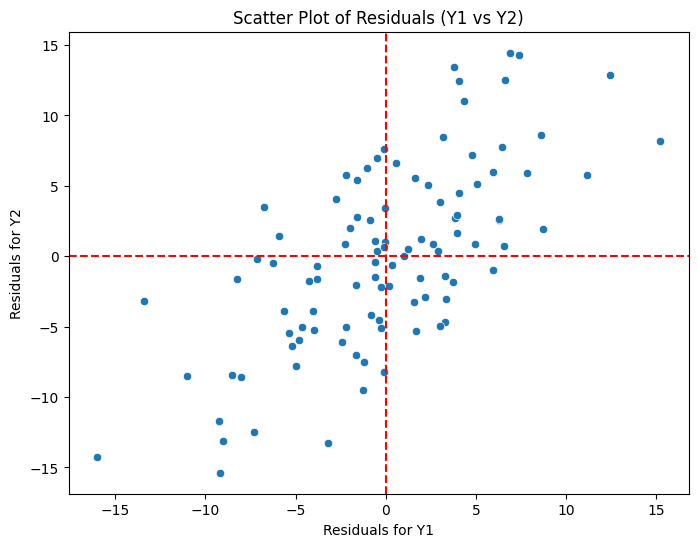

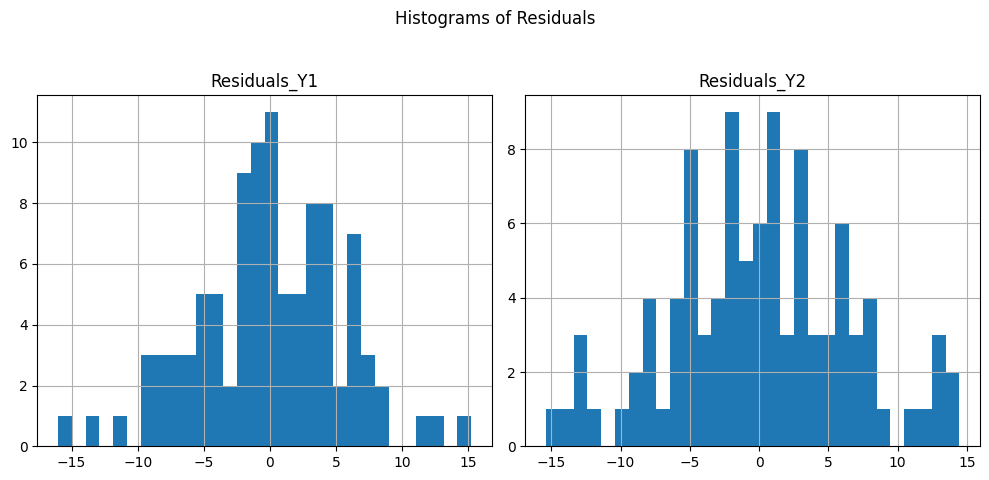

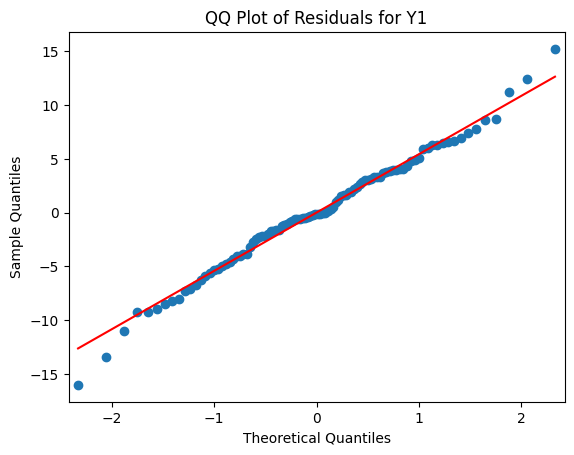

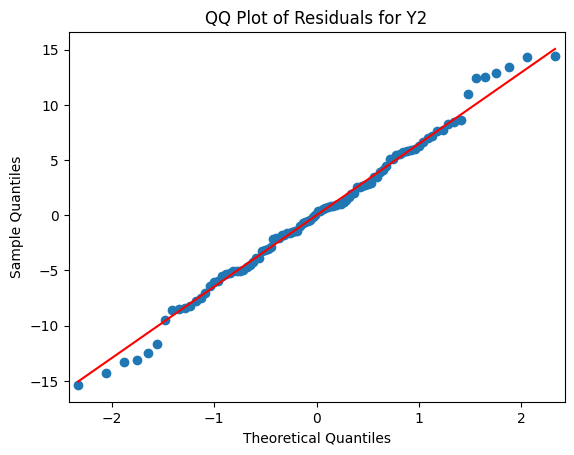

In [109]:
# Get the residuals from the individual OLS models
residuals_Y1 = model_Y1.resid
residuals_Y2 = model_Y2.resid

# Combine residuals into a DataFrame
residuals_df = pd.DataFrame({
    'Residuals_Y1': residuals_Y1,
    'Residuals_Y2': residuals_Y2
})

# Uji normalitas univariat untuk masing-masing residual
print("Shapiro-Wilk Test for Residuals:")
for col in residuals_df.columns:
    stat, p = shapiro(residuals_df[col])
    print(f"{col} → Shapiro-Wilk stat={stat:.4f}, p={p:.4f}")

print("Jarque Berra Test for Residuals:")
for col in residuals_df.columns:
    stat, p = jarque_bera(residuals_df[col])
    print(f"{col} → Jarque-Bera stat={stat:.4f}, p={p:.4f}")

# Uji normalitas multivariat untuk residual
print("\nMultivariate Normality Test for Residuals:")
mvn_stat_res, mvn_p_res, mvn_bic_res = multivariate_normality(residuals_df, alpha=0.05)
print(f"Multivariate normality test p-value = {mvn_p_res:.4f}")

# Interpret the results
alpha = 0.05
if mvn_p_res < alpha:
    print(f"Since the p-value ({mvn_p_res:.4f}) is less than alpha ({alpha}), we reject the null hypothesis.")
    print("The residuals are not multivariate normally distributed.")
else:
    print(f"Since the p-value ({mvn_p_res:.4f}) is greater than or equal to alpha ({alpha}), we fail to reject the null hypothesis.")
    print("The residuals are multivariate normally distributed. The assumption is met.")

# Optional: Visualize residuals with a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Residuals_Y1', y='Residuals_Y2', data=residuals_df)
plt.title('Scatter Plot of Residuals (Y1 vs Y2)')
plt.xlabel('Residuals for Y1')
plt.ylabel('Residuals for Y2')
plt.axhline(0, color='red', linestyle='--')
plt.axvline(0, color='red', linestyle='--')
plt.show()

# Optional: Histograms of residuals
residuals_df.hist(bins=30, figsize=(10, 5))
plt.suptitle('Histograms of Residuals')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Optional: QQ plots of residuals
sm.qqplot(residuals_Y1, line='s')
plt.title('QQ Plot of Residuals for Y1')
plt.show()

sm.qqplot(residuals_Y2, line='s')
plt.title('QQ Plot of Residuals for Y2')
plt.show()

### Asumsi Homoskedastisitas

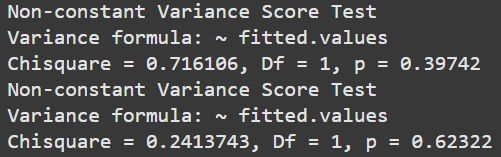

In [110]:
from IPython.display import Image, display

# Uji Glejser dengan R
display(Image(PATH+'/Uji Glejser.png'))

### Asumsi Non-autokorelasi

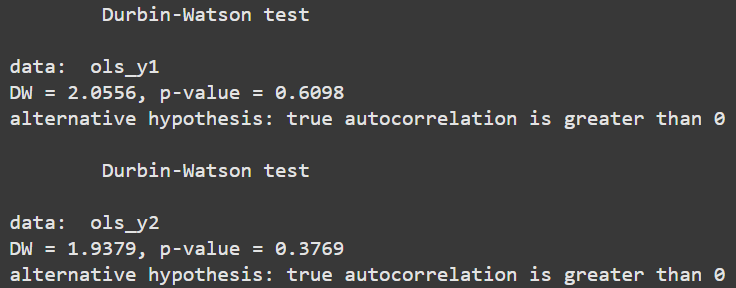

In [111]:
from IPython.display import Image, display

# Uji Durbin Watson dengan R
display(Image(PATH+'/Uji Durbin Watson.png'))

## Langkah 8: Menghitung Ukuran Kebaikan Model

### Koefisien Determinasi

In [112]:
# # Hitung Adjusted R-squared untuk setiap model OLS
# print("\nUkuran Kebaikan Model (Adjusted R-squared):")
# print(f"Adjusted R-squared for Y1 (Skor_Kognitif_Terstandarisasi): {model_Y1.rsquared_adj:.4f}")
# print(f"Adjusted R-squared for Y2 (Indeks_Kematangan_Karakter): {model_Y2.rsquared_adj:.4f}")

# Hitung R-squared untuk setiap model OLS
print("\nUkuran Kebaikan Model (R-squared):")
print(f"R-squared for Y1 (Skor_Kognitif_Terstandarisasi): {model_Y1.rsquared:.4f}")
print(f"R-squared for Y2 (Indeks_Kematangan_Karakter): {model_Y2.rsquared:.4f}")

# Untuk model multivariat secara keseluruhan (MANOVA), tidak ada Adjusted R-squared tunggal seperti OLS.
# Kita melihat hasil MANOVA test statistics (Pillai's Trace, Wilks' Lambda, Hotelling-Lawley Trace, Roy's largest root)
# dan p-value-nya untuk menilai signifikansi keseluruhan model.
# Output dari manova.mv_test() sudah memberikan informasi ini di Langkah 6.
# Jika p-value dari MANOVA test statistics signifikan (misalnya < 0.05), itu menunjukkan bahwa setidaknya
# satu dari variabel independen secara signifikan mempengaruhi setidaknya satu dari variabel dependen secara simultan.
print("\nInterpretasi Ukuran Kebaikan Model MANOVA (dari Langkah 6):")
print("Lihat hasil 'mv_test()' dari objek MANOVA di Langkah 6.")
print("P-value yang signifikan (< 0.05) pada test statistics (seperti Wilks' Lambda) menunjukkan bahwa")
print("model regresi multivariat secara keseluruhan signifikan dalam menjelaskan variasi pada variabel dependen.")

# Tambahan: Melihat F-statistic dan p-value dari ANOVA summary untuk setiap model OLS juga
# memberikan indikasi goodness-of-fit untuk masing-masing variabel dependen.
print("\nF-statistic dan p-value dari ANOVA (dari Langkah 5 summaries):")
print(f"ANOVA F-statistic for Y1: {model_Y1.fvalue:.4f}, p-value: {model_Y1.f_pvalue:.4f}")
print(f"ANOVA F-statistic for Y2: {model_Y2.fvalue:.4f}, p-value: {model_Y2.f_pvalue:.4f}")
print("Jika p-value ANOVA < 0.05, model regresi untuk variabel dependen tersebut signifikan.")


Ukuran Kebaikan Model (R-squared):
R-squared for Y1 (Skor_Kognitif_Terstandarisasi): 0.6844
R-squared for Y2 (Indeks_Kematangan_Karakter): 0.5690

Interpretasi Ukuran Kebaikan Model MANOVA (dari Langkah 6):
Lihat hasil 'mv_test()' dari objek MANOVA di Langkah 6.
P-value yang signifikan (< 0.05) pada test statistics (seperti Wilks' Lambda) menunjukkan bahwa
model regresi multivariat secara keseluruhan signifikan dalam menjelaskan variasi pada variabel dependen.

F-statistic dan p-value dari ANOVA (dari Langkah 5 summaries):
ANOVA F-statistic for Y1: 40.7784, p-value: 0.0000
ANOVA F-statistic for Y2: 24.8228, p-value: 0.0000
Jika p-value ANOVA < 0.05, model regresi untuk variabel dependen tersebut signifikan.


### Eta Squared

In [113]:
eta_squared = 1 - wilks_lambda
print(f"Eta Squared (η²): {eta_squared:.4f}")

Eta Squared (η²): 0.8735


## Langkah 9: Menentukan faktor signifikan yang memengaruhi

In [114]:
print("\nMenentukan faktor signifikan yang memengaruhi:")

# Faktorsignifikan dapat dilihat dari hasil uji parsial (uji t) pada summary model OLS
# di Langkah 5, dan juga dari hasil uji serentak (MANOVA) di Langkah 6.

print("\nDari hasil Multivariate Regression (Langkah 5):")
print("Variabel independen yang memiliki p-value pada uji t (< 0.05, atau tingkat signifikansi yang dipilih)")
print("pada summary() untuk Y1 atau Y2 dianggap signifikan secara parsial mempengaruhi variabel dependen tersebut.")

print("\nUntuk Y1 (Skor_Kognitif_Terstandarisasi):")
# Identifikasi variabel signifikan dari summary model Y1
print("Lihat tabel coef di summary model_Y1 di Langkah 5.")
print("Variabel dengan P>|t| kurang dari 0.05 adalah faktor signifikan untuk Y1.")
# Example of how to extract significant variables (adjust alpha if needed)
alpha_parsial = 0.05
significant_vars_Y1 = model_Y1.pvalues[model_Y1.pvalues < alpha_parsial].index.tolist()
# Remove 'const' if it's in the list
if 'const' in significant_vars_Y1:
    significant_vars_Y1.remove('const')
print(f"Variabel signifikan untuk Y1 (alpha={alpha_parsial}): {significant_vars_Y1}")


print("\nUntuk Y2 (Indeks_Kematangan_Karakter):")
# Identifikasi variabel signifikan dari summary model Y2
print("Lihat tabel coef di summary model_Y2 di Langkah 5.")
print("Variabel dengan P>|t| kurang dari 0.05 adalah faktor signifikan untuk Y2.")
# Example of how to extract significant variables (adjust alpha if needed)
alpha_parsial = 0.05
significant_vars_Y2 = model_Y2.pvalues[model_Y2.pvalues < alpha_parsial].index.tolist()
# Remove 'const' if it's in the list
if 'const' in significant_vars_Y2:
    significant_vars_Y2.remove('const')
print(f"Variabel signifikan untuk Y2 (alpha={alpha_parsial}): {significant_vars_Y2}")


print("\nDari hasil MANOVA (Langkah 6):")
print("Uji MANOVA menguji signifikansi pengaruh setiap variabel independen terhadap semua variabel dependen secara simultan.")
print("Lihat tabel 'mv_test()' dari objek MANOVA di Langkah 6.")
print("Baris yang memiliki p-value (Pr > F) kurang dari 0.05 (atau tingkat signifikansi yang dipilih)")
print("untuk test statistics (seperti Wilks' Lambda) menunjukkan bahwa variabel independen tersebut secara signifikan")
print("memengaruhi setidaknya satu dari variabel dependen secara simultan.")

# Extract MANOVA test results and interpret
manova_results_summary = manova.mv_test()
print("\nMANOVA Test Results Summary:")
print(manova_results_summary)

alpha_manova = 0.05
print(f"\nInterpreting MANOVA Results (using alpha={alpha_manova}):")

# Check p-values for each independent variable in the MANOVA output
# We typically look at the p-value for Wilks' Lambda, but other tests are also presented.
# The index of the table in manova_results_summary corresponds to the independent variables.
# Skip the last row which is for Residuals
independent_variable_names_manova = independent_vars # Use the variable names defined earlier

print("\nSummary of MANOVA significance for each independent variable:")
for i, var_name in enumerate(independent_variable_names_manova):
    # Access the row for the specific independent variable
    # MANOVA test summary has a structure that requires careful indexing.
    # Let's iterate through the printed table structure to find the p-value for Wilks' Lambda
    # This might be fragile if the output format changes, but it's a common approach.
    # A more robust way would be to access the internal results object, but the printed summary is user-friendly.

    # Let's re-run the MANOVA test and inspect the structure programmatically if possible
    # Or, rely on manual interpretation of the printed table.
    # For simplicity and clarity given the context (Jupyter/Colab), we will refer the user to the printed table.
    # A more programmatic way would involve parsing the MANOVA result object directly if needed.
    # For example:
    # manova_results = manova.mv_test()
    # access p-value like manova_results['MV.test'].loc[var_name, 'Wilks'] # This structure needs verification

    # Since directly parsing the printed table is complex and prone to errors if output format changes,
    # we will instruct the user to read the table from the previous output.

    # Print instruction for the user to interpret MANOVA table row by row
    print(f"  Look at the row for '{var_name}' in the MANOVA Test Results Summary above (Langkah 6).")
    print(f"  If the 'Pr > F' value for any of the tests (Wilks' Lambda, Pillai's Trace, etc.) is less than {alpha_manova},")
    print(f"  then '{var_name}' is considered a significant factor influencing Y1 and Y2 simultaneously.")

print("\nKesimpulan Mengenai Faktor Signifikan:")
print("- Faktor yang signifikan memengaruhi Skor Kognitif (Y1) adalah variabel independen yang p-value uji t-nya < 0.05 pada summary model_Y1.")
print("- Faktor yang signifikan memengaruhi Indeks Kematangan Karakter (Y2) adalah variabel independen yang p-value uji t-nya < 0.05 pada summary model_Y2.")
print("- Faktor yang signifikan memengaruhi Skor Kognitif dan Indeks Kematangan Karakter secara simultan (bersama-sama) adalah variabel independen yang p-value pada uji MANOVA < 0.05.")
print("\nLihat kembali output summary model OLS (Langkah 5) dan MANOVA test results (Langkah 6) untuk daftar faktor signifikan secara spesifik.")




Menentukan faktor signifikan yang memengaruhi:

Dari hasil Multivariate Regression (Langkah 5):
Variabel independen yang memiliki p-value pada uji t (< 0.05, atau tingkat signifikansi yang dipilih)
pada summary() untuk Y1 atau Y2 dianggap signifikan secara parsial mempengaruhi variabel dependen tersebut.

Untuk Y1 (Skor_Kognitif_Terstandarisasi):
Lihat tabel coef di summary model_Y1 di Langkah 5.
Variabel dengan P>|t| kurang dari 0.05 adalah faktor signifikan untuk Y1.
Variabel signifikan untuk Y1 (alpha=0.05): ['Pajanan_Teknologi_Pendidikan', 'Partisipasi_Seni_Olahraga', 'Indeks_Gizi_Seimbang', 'Iklim_Belajar_Sekolah']

Untuk Y2 (Indeks_Kematangan_Karakter):
Lihat tabel coef di summary model_Y2 di Langkah 5.
Variabel dengan P>|t| kurang dari 0.05 adalah faktor signifikan untuk Y2.
Variabel signifikan untuk Y2 (alpha=0.05): ['Partisipasi_Seni_Olahraga', 'Indeks_Gizi_Seimbang', 'Kualitas_Interaksi_OrangTua', 'Iklim_Belajar_Sekolah']

Dari hasil MANOVA (Langkah 6):
Uji MANOVA menguji si

# Clustering

In [115]:
numerical_columns = ["Pajanan_Teknologi_Pendidikan", "Indeks_Gizi_Seimbang", "Kualitas_Interaksi_OrangTua", "Iklim_Belajar_Sekolah"]
categorical_columns = ["Partisipasi_Seni_Olahraga"]
clustering_columns = numerical_columns + categorical_columns

In [116]:
df_clustering = df.copy()
df_clustering = df_clustering[clustering_columns]

## Langkah 1: Deteksi Multikolinearitas

In [117]:
# Fungsi untuk menghitung VIF berdasarkan kolom numerik yang ada di dataframe
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(df, global_numerical_columns):
    available_numerical_columns = [col for col in global_numerical_columns if col in df.columns]
    X_numeric = df[available_numerical_columns]
    vif_data = pd.DataFrame()
    vif_data['Feature'] = available_numerical_columns
    vif_data['VIF'] = [variance_inflation_factor(X_numeric.values, i) for i in range(X_numeric.shape[1])]
    return vif_data

# --- Langkah 1: Cek Multikolinearitas untuk df_clustering ---
print("VIF untuk df_clustering:")
vif_umum = calculate_vif(df_clustering, numerical_columns)
print(vif_umum)

VIF untuk df_clustering:
                        Feature  VIF
0  Pajanan_Teknologi_Pendidikan 4.98
1          Indeks_Gizi_Seimbang 6.52
2   Kualitas_Interaksi_OrangTua 5.55
3         Iklim_Belajar_Sekolah 9.07


In [118]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

r2_scores = {}
for i in range(len(clustering_columns)):
    target_variable = clustering_columns[i]
    independent_variables = [col for j, col in enumerate(clustering_columns) if i != j]

    X = df[independent_variables]
    y = df[target_variable]

    X = X.dropna()
    y = y.loc[X.index]

    if not X.empty:
        model = LinearRegression()
        model.fit(X, y)
        y_pred = model.predict(X)
        r2 = r2_score(y, y_pred)
        r2_scores[f'{target_variable}'] = r2
    else:
        r2_scores[f'{target_variable}'] = np.nan


# Print the calculated R-squared values
for variable, r2 in r2_scores.items():
    # print(f"R^2 for {variable}: {r2:.4f}")
    print(f"VIF for {variable}: {1/(1-r2):.4f}")

VIF for Pajanan_Teknologi_Pendidikan: 1.0488
VIF for Indeks_Gizi_Seimbang: 1.0186
VIF for Kualitas_Interaksi_OrangTua: 1.0342
VIF for Iklim_Belajar_Sekolah: 1.0208
VIF for Partisipasi_Seni_Olahraga: 1.0471


## Langkah 2: KMO Test

In [119]:
!pip install factor-analyzer

In [120]:
from factor_analyzer.factor_analyzer import calculate_kmo
# Fungsi untuk menjalankan KMO Test
def perform_kmo_test(df, global_numerical_columns):
    # Pilih kolom numerik yang tersedia di dataframe
    available_numerical_columns = [col for col in global_numerical_columns if col in df.columns]
    X_numeric = df[available_numerical_columns]

    # Lakukan KMO Test
    kmo_all, kmo_model = calculate_kmo(X_numeric)
    return kmo_model, available_numerical_columns

# --- Langkah 2: KMO Test untuk df_clustering ---
print("KMO Test untuk df_clustering:")
kmo_model, cols = perform_kmo_test(df_clustering, numerical_columns)
print(f"KMO Test (df_clustering): {kmo_model:.3f} untuk kolom {cols}")

KMO Test untuk df_clustering:
KMO Test (df_clustering): 0.545 untuk kolom ['Pajanan_Teknologi_Pendidikan', 'Indeks_Gizi_Seimbang', 'Kualitas_Interaksi_OrangTua', 'Iklim_Belajar_Sekolah']


Dikarenakan KMO Test menunjukkan hasil < 0.6, tidak perlu dilakukan PCA. Selain itu, tidak ada variabel yang perlu dihilangkan karena tidak terdapat nilai VIF yang lebih dari 10.

## Langkah 3: Pemilihan Banyak Klaster Optimum

Silhouette Method untuk df_clustering:
Silhouette Score untuk 2 klaster: 0.2513217230166945
Silhouette Score untuk 3 klaster: 0.24356256179922442
Silhouette Score untuk 4 klaster: 0.23309520797046632
Silhouette Score untuk 5 klaster: 0.23915797843118095
Silhouette Score untuk 6 klaster: 0.237149203218702
Silhouette Score untuk 7 klaster: 0.23969254311393964
Silhouette Score untuk 8 klaster: 0.261038515497239
Silhouette Score untuk 9 klaster: 0.24900536310810673
Silhouette Score untuk 10 klaster: 0.2550622478052539


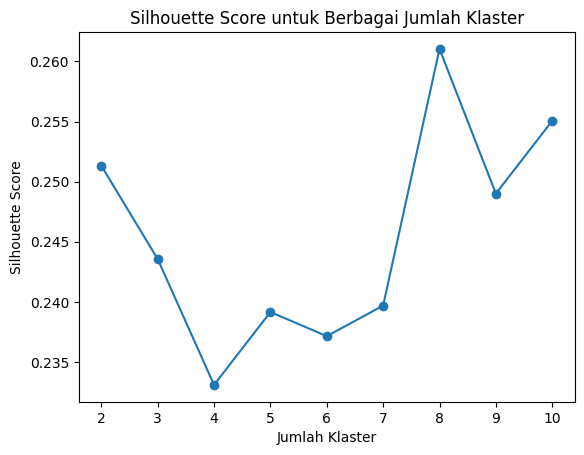

Jumlah klaster optimal berdasarkan Silhouette Score: 8


In [121]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt

# Fungsi untuk menjalankan Elbow Method menggunakan Silhouette Score
def perform_silhouette_elbow_method(df, max_k=10):
    silhouette_scores = []
    for k in range(2, max_k+1):
        kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
        kmeans.fit(df)
        labels = kmeans.labels_
        score = silhouette_score(df, labels)
        silhouette_scores.append(score)
        print(f"Silhouette Score untuk {k} klaster: {score}")

    # Menampilkan grafik Silhouette Scores
    plt.plot(range(2, max_k+1), silhouette_scores, marker='o')
    plt.title("Silhouette Score untuk Berbagai Jumlah Klaster")
    plt.xlabel("Jumlah Klaster")
    plt.ylabel("Silhouette Score")
    plt.show()

    # Mengembalikan jumlah klaster optimal berdasarkan Silhouette Score tertinggi
    optimal_k = np.argmax(silhouette_scores) + 2
    print(f"Jumlah klaster optimal berdasarkan Silhouette Score: {optimal_k}")
    return optimal_k

# --- Silhouette Method untuk df_clustering ---
print("Silhouette Method untuk df_clustering:")
optimal_k_clustering = perform_silhouette_elbow_method(df_clustering)

DB-Index Method untuk df_clustering:


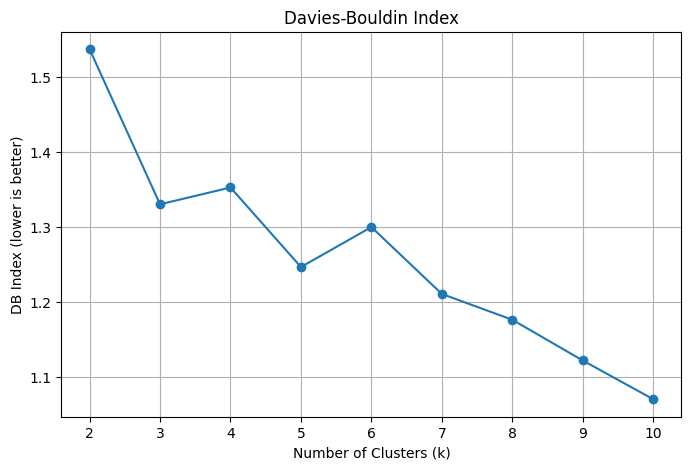

Jumlah klaster optimal berdasarkan Davies-Bouldin Index: 10


In [122]:
from sklearn.metrics import davies_bouldin_score

def db_index_method(df, numerical_cols, max_k=10):
    # Pilih kolom numerik yang tersedia di dataframe
    available_numerical_columns = [col for col in numerical_cols if col in df.columns]
    X = df[available_numerical_columns]
    scores = []
    k_values = range(2, max_k + 1)

    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(X)
        score = davies_bouldin_score(X, labels)
        scores.append(score)

    plt.figure(figsize=(8, 5))
    plt.plot(k_values, scores, marker='o')
    plt.title('Davies-Bouldin Index')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('DB Index (lower is better)')
    plt.grid(True)
    plt.show()

    optimal_k = k_values[scores.index(min(scores))]
    print(f"Jumlah klaster optimal berdasarkan Davies-Bouldin Index: {optimal_k}")
    return optimal_k

# --- DB-Index Method untuk df_clustering ---
print("DB-Index Method untuk df_clustering:")
optimal_k_clustering = db_index_method(df_clustering, numerical_columns)

CH Method untuk df_clustering:


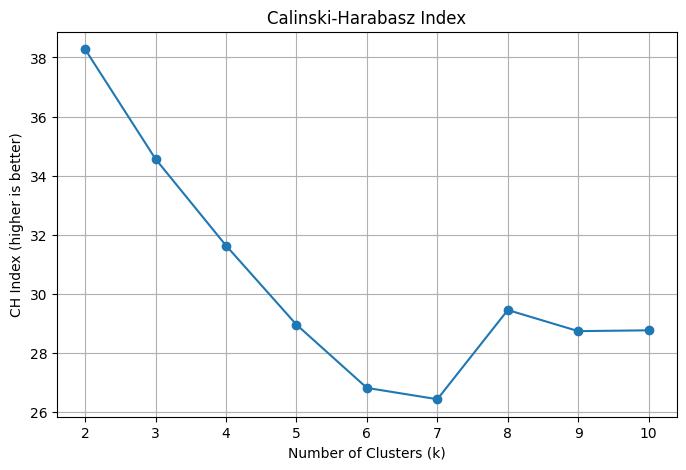

Jumlah klaster optimal berdasarkan Calinski-Harabasz Index: 2


In [123]:
from sklearn.metrics import calinski_harabasz_score

def calinski_harabasz_method(df, numerical_cols, max_k=10):
    # Pilih kolom numerik yang tersedia di dataframe
    available_numerical_columns = [col for col in numerical_cols if col in df.columns]
    X = df[available_numerical_columns]
    scores = []
    k_values = range(2, max_k + 1)

    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(X)
        score = calinski_harabasz_score(X, labels)
        scores.append(score)

    plt.figure(figsize=(8, 5))
    plt.plot(k_values, scores, marker='o')
    plt.title('Calinski-Harabasz Index')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('CH Index (higher is better)')
    plt.grid(True)
    plt.show()

    optimal_k = k_values[scores.index(max(scores))]
    print(f"Jumlah klaster optimal berdasarkan Calinski-Harabasz Index: {optimal_k}")
    return optimal_k

# --- CH Method untuk df_clustering ---
print("CH Method untuk df_clustering:")
optimal_k_clustering = calinski_harabasz_method(df_clustering, numerical_columns)

Elbow Method untuk df_clustering:


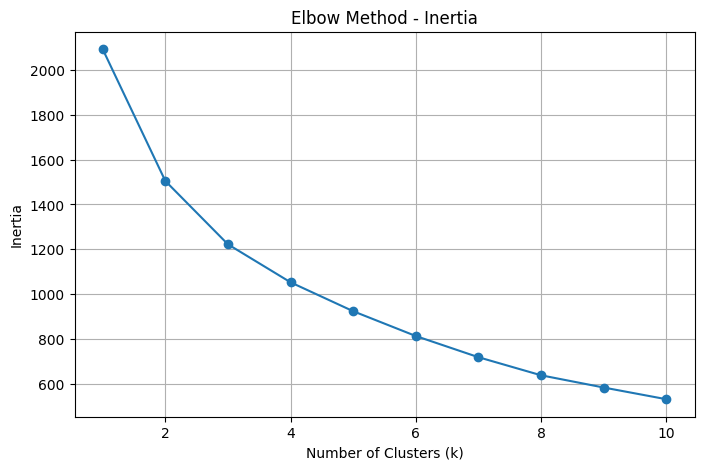

In [124]:
def elbow_method_inertia(df, numerical_cols, max_k=10):
    # Pilih kolom numerik yang tersedia di dataframe
    available_numerical_columns = [col for col in numerical_cols if col in df.columns]
    X = df[available_numerical_columns]
    inertias = []
    k_values = range(1, max_k + 1)

    for k in k_values:
        # kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
        kmeans.fit(X)
        inertias.append(kmeans.inertia_)

    plt.figure(figsize=(8, 5))
    plt.plot(k_values, inertias, marker='o')
    plt.title('Elbow Method - Inertia')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()

# implementasi di df_clustering
print("Elbow Method untuk df_clustering:")
elbow_method_inertia(df_clustering, numerical_columns)

## Langkah 4: Clustering

### K-Prototype

In [125]:
!pip install kmodes

K-Prototypes untuk df_clustering:


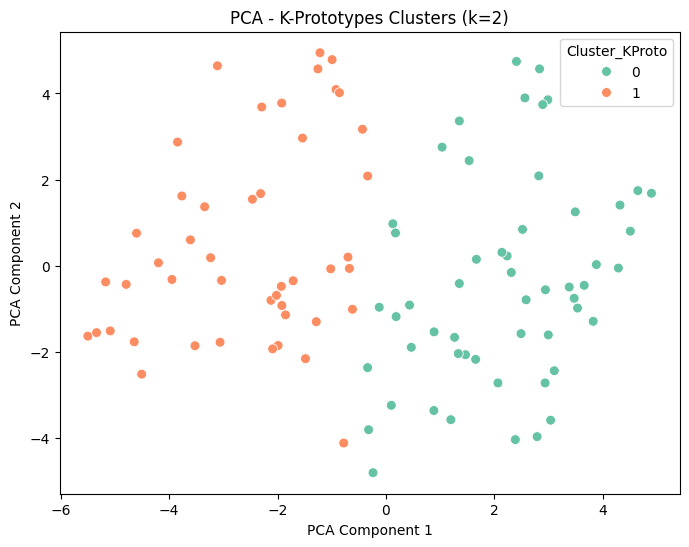

In [126]:
from kmodes.kprototypes import KPrototypes
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Fungsi untuk menjalankan K-Prototypes dan visualisasi PCA
def perform_kprototypes_and_pca(df, numerical_columns, categorical_columns, k_optimal):
    # Pisahkan kolom numerik dan kategorikal
    numeric_data = df[[col for col in numerical_columns if col in df.columns]]
    categorical_data = df[[col for col in categorical_columns if col in df.columns]]
    categorical_data = categorical_data.astype('category')

    # Gabungkan data numerik dan kategorikal
    combined_data = pd.concat([numeric_data, categorical_data], axis=1)

    # One-Hot Encoding untuk variabel kategorik jika ada categorical_data
    if not categorical_data.empty:
        X_categoric_encoded = pd.get_dummies(categorical_data, drop_first=True)
        data_encoded = pd.concat([numeric_data, X_categoric_encoded], axis=1)
    else:
        data_encoded = numeric_data

    # Konversi data kategorikal ke string untuk K-Prototypes
    for col in categorical_columns:
        if col in df.columns:
            combined_data[col] = combined_data[col].astype(str)

    # Jalankan K-Prototypes
    kproto = KPrototypes(n_clusters=k_optimal, init='Huang', random_state=42)
    clusters_kproto = kproto.fit_predict(combined_data, categorical=[df.columns.get_loc(col) for col in categorical_columns if col in df.columns])

    # Visualisasi hasil klaster menggunakan PCA (numerik saja)
    pca_2d = PCA(n_components=2)
    pca_result = pca_2d.fit_transform(data_encoded)

    # Buat DataFrame untuk visualisasi
    pca_df = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2'])
    pca_df['Cluster_KProto'] = clusters_kproto

    # Tambahkan hasil klaster ke DataFrame
    df['Cluster_KProto'] = clusters_kproto

    # Plot hasil PCA
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster_KProto', data=pca_df, palette='Set2', s=50)
    plt.title(f'PCA - K-Prototypes Clusters (k={k_optimal})')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.legend(title='Cluster_KProto', loc='best')
    plt.show()
# --- Jalankan untuk df_clustering ---
print("K-Prototypes untuk df_clustering:")
perform_kprototypes_and_pca(df_clustering, numerical_columns, categorical_columns, optimal_k_clustering)

### AD K-Means

K-Means untuk df_clustering:


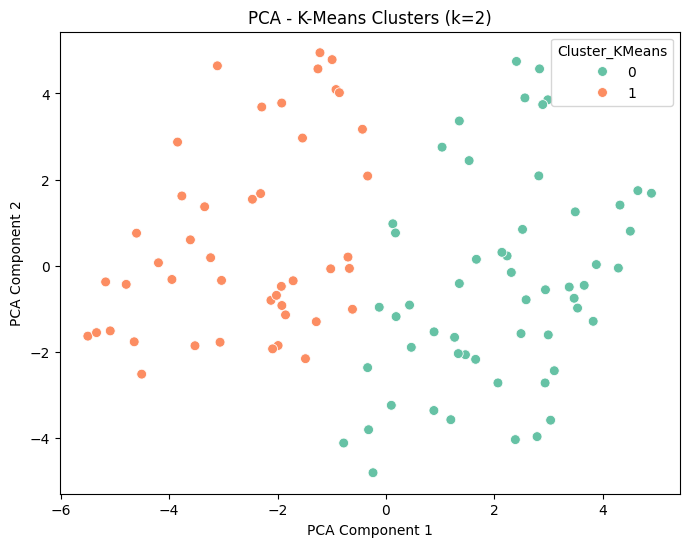

In [127]:
# Fungsi untuk memilih kolom numerik yang tersedia dalam dataframe
def get_numeric_data(df, numerical_columns):
    return df[[col for col in numerical_columns if col in df.columns]]
#fungsi untuk memilih kolom kategorik yang tersedia dalam dataframe
def get_categorical_data(df, categorical_columns):
    return df[[col for col in categorical_columns if col in df.columns]]

# Fungsi untuk menjalankan K-Means dan visualisasi PCA
def perform_ad_kmeans_and_pca(df, k_optimal):
    # Pilih data numerik berdasarkan kolom yang ada
    X_numeric = get_numeric_data(df, numerical_columns)
    X_categoric = get_categorical_data(df, categorical_columns)
    X_categoric = X_categoric.astype('category')

    # One-Hot Encoding untuk variabel kategorik jika ada X_categoric
    if not X_categoric.empty:
        X_categoric_encoded = pd.get_dummies(X_categoric, drop_first=True)
        data_encoded = pd.concat([X_numeric, X_categoric_encoded], axis=1)
    else:
        data_encoded = X_numeric

    # Jalankan K-Means
    kmeans = KMeans(n_clusters=k_optimal, init='k-means++', n_init=10, random_state=42)
    clusters_kmeans = kmeans.fit_predict(data_encoded)

    # PCA untuk visualisasi
    pca_2d = PCA(n_components=2)
    pca_result = pca_2d.fit_transform(data_encoded)

    # Buat DataFrame untuk visualisasi
    pca_df = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2'])
    pca_df['Cluster_KMeans'] = clusters_kmeans

    # Tambahkan hasil klaster ke DataFrame
    df['Cluster_KMeans'] = clusters_kmeans

    # Plot hasil PCA
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster_KMeans', data=pca_df, palette='Set2', s=50)
    plt.title(f'PCA - K-Means Clusters (k={k_optimal})')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.legend(title='Cluster_KMeans', loc='best')
    plt.show()

# --- Jalankan untuk df_clustering ---
print("K-Means untuk df_clustering:")
perform_ad_kmeans_and_pca(df_clustering, optimal_k_clustering)

### K-Medoids using Gower's Distance

In [128]:
!pip install gower

K-Medoids untuk df_clustering:


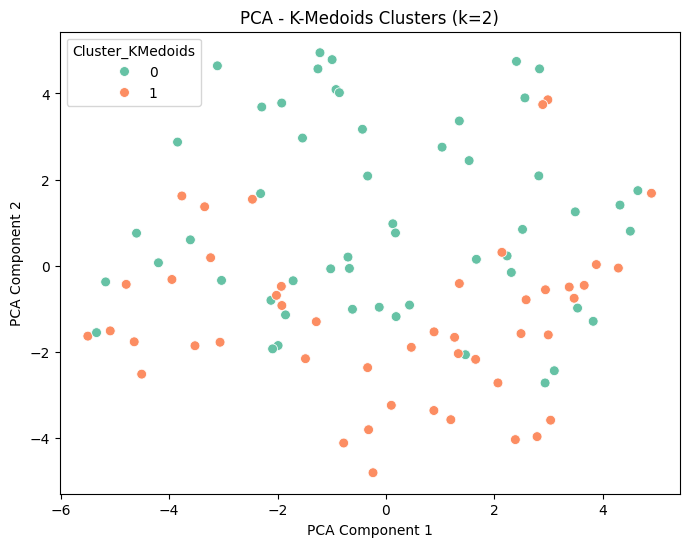

In [129]:
import gower
from sklearn_extra.cluster import KMedoids

# Fungsi untuk menjalankan K-Medoids dan visualisasi PCA
def perform_kmedoids_and_pca(df, categorical_columns, k_optimal):
    categorical_data = df[[col for col in categorical_columns if col in df.columns]]
    numeric_data = df[[col for col in numerical_columns if col in df.columns]]
    categorical_data = categorical_data.astype(str)

    # Gabungkan data numerik dan kategorikal
    combined_data = pd.concat([numeric_data, categorical_data], axis=1)

    # Hitung matriks Gower Distance
    gower_dist = gower.gower_matrix(combined_data)

    # Jalankan K-Medoids
    kmedoids = KMedoids(n_clusters=k_optimal, metric="precomputed", random_state=42)
    kmedoids.fit(gower_dist)
    clusters_kmedoids = kmedoids.labels_

    # One-Hot Encoding untuk variabel kategorik jika ada categorical_data
    if not categorical_data.empty:
        X_categoric_encoded = pd.get_dummies(categorical_data, drop_first=True)
        data_encoded = pd.concat([numeric_data, X_categoric_encoded], axis=1)
    else:
        data_encoded = numeric_data

    # PCA untuk visualisasi
    pca_2d = PCA(n_components=2)
    pca_result = pca_2d.fit_transform(data_encoded)

    # Buat DataFrame untuk visualisasi
    pca_df = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2'])
    pca_df['Cluster_KMedoids'] = clusters_kmedoids

    # Tambahkan hasil klaster ke DataFrame
    df['Cluster_KMedoids'] = clusters_kmedoids

    # Plot hasil PCA
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster_KMedoids', data=pca_df, palette='Set2', s=50)
    plt.title(f'PCA - K-Medoids Clusters (k={k_optimal})')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.legend(title='Cluster_KMedoids', loc='best')
    plt.show()

# --- Jalankan untuk df_clustering ---
print("K-Medoids untuk df_clustering:")
perform_kmedoids_and_pca(df_clustering, categorical_columns, optimal_k_clustering)

In [130]:
def get_gower_matrix(df, categorical_columns, numerical_columns):
    categorical_data = df[[col for col in categorical_columns if col in df.columns]]
    numeric_data = df[[col for col in numerical_columns if col in df.columns]]
    if not categorical_data.empty:
        categorical_data = categorical_data.astype(str)
        combined_data = pd.concat([numeric_data, categorical_data], axis=1)
    else:
        combined_data = numeric_data
    gower_dist = gower.gower_matrix(combined_data)
    return gower_dist

gower_clustering = get_gower_matrix(df_clustering, categorical_columns, numerical_columns)

### Agglomerative Using Gower's Distance

Agglomerative Clustering untuk df_clustering:


/tmp/ipython-input-131-328043726.py:10: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(gower_dist, method='average')


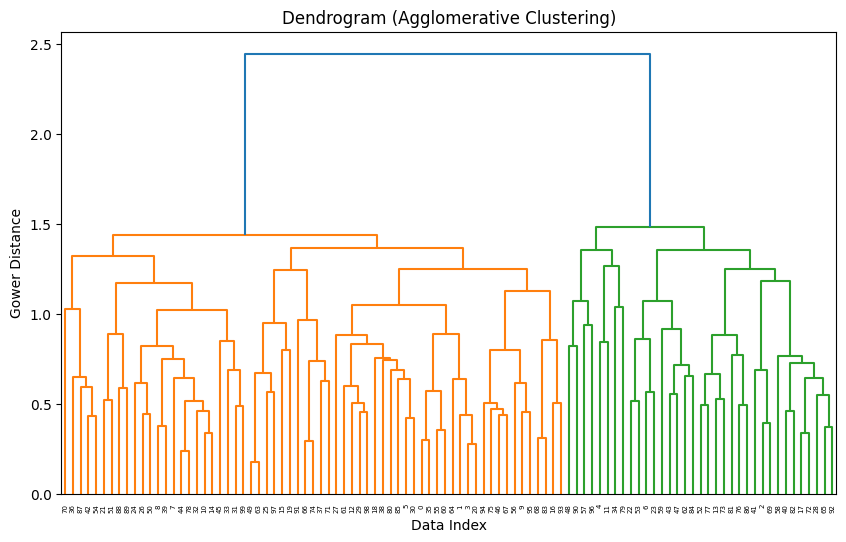

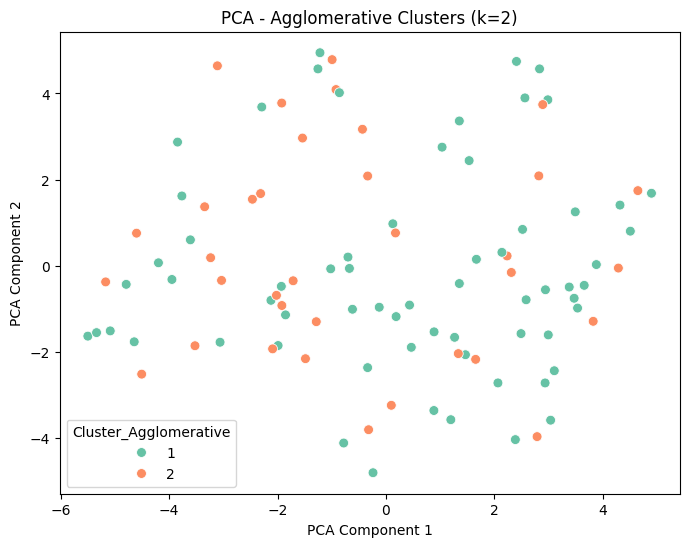

In [131]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# Fungsi untuk menjalankan Agglomerative Clustering dan visualisasi PCA
def perform_agglomerative_and_pca(df, k_optimal, gower_dist):
    categorical_data = df[[col for col in categorical_columns if col in df.columns]]
    numeric_data = df[[col for col in numerical_columns if col in df.columns]]

    # Step 2: Agglomerative Clustering menggunakan linkage
    # 'average' digunakan untuk rata-rata jarak antar cluster
    linkage_matrix = linkage(gower_dist, method='average')

    # Step 3: Visualisasi dendrogram
    plt.figure(figsize=(10, 6))
    dendrogram(linkage_matrix, labels=df.index, leaf_rotation=90)
    plt.title('Dendrogram (Agglomerative Clustering)')
    plt.xlabel('Data Index')
    plt.ylabel('Gower Distance')
    plt.show()

    # Step 4: Tentukan klaster
    clusters = fcluster(linkage_matrix, t=k_optimal, criterion='maxclust')
    clusters_agg = clusters

    # One-Hot Encoding untuk variabel kategorik jika ada categorical_data
    if not categorical_data.empty:
        categorical_data = categorical_data.astype(str)
        X_categoric_encoded = pd.get_dummies(categorical_data, drop_first=True)
        data_encoded = pd.concat([numeric_data, X_categoric_encoded], axis=1)
    else:
        data_encoded = numeric_data

    # PCA untuk visualisasi
    pca_2d = PCA(n_components=2)
    pca_result = pca_2d.fit_transform(data_encoded)

    # Buat DataFrame untuk visualisasi
    pca_df = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2'])
    pca_df['Cluster_Agglomerative'] = clusters_agg

    # Tambahkan hasil klaster ke DataFrame
    df['Cluster_Agglomerative'] = clusters_agg

    # Plot hasil PCA
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster_Agglomerative', data=pca_df, palette='Set2', s=50)
    plt.title(f'PCA - Agglomerative Clusters (k={k_optimal})')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.legend(title='Cluster_Agglomerative', loc='best')
    plt.show()

# --- Jalankan untuk df_clustering ---
print("Agglomerative Clustering untuk df_clustering:")
perform_agglomerative_and_pca(df_clustering, optimal_k_clustering, gower_clustering)

## Langkah 5: Evaluasi Model Klaster

In [132]:
# Fungsi untuk memilih kolom numerik yang tersedia dalam dataframe
def get_numeric_data(df, numerical_columns):
    return df[[col for col in numerical_columns if col in df.columns]]
#fungsi untuk memilih kolom kategorik yang tersedia dalam dataframe
def get_categorical_data(df, categorical_columns):
    return df[[col for col in categorical_columns if col in df.columns]]

# Fungsi untuk menghitung metrik evaluasi clustering
def evaluate_clustering(cluster_labels, df, numerical_columns, categorical_columns, gower_dist):
    # Pilih data numerik berdasarkan kolom yang ada
    X_numeric = get_numeric_data(df, numerical_columns)
    X_categoric = get_categorical_data(df, categorical_columns)
    X_categoric = X_categoric.astype(str)

    # One-Hot Encoding untuk variabel kategorik jika ada categorical_data
    if not X_categoric.empty:
        X_categoric_encoded = pd.get_dummies(X_categoric, drop_first=True)
        data_encoded = pd.concat([X_numeric, X_categoric_encoded], axis=1)
    else:
        data_encoded = X_numeric

    # Metrik Evaluasi
    # Silhouette Score
    sil_score = silhouette_score(gower_dist, cluster_labels, metric="precomputed")
    print(f"Silhouette Score: {sil_score}")

    # Davies-Bouldin Index
    dbi_score = davies_bouldin_score(data_encoded, cluster_labels)
    print(f"Davies-Bouldin Index: {dbi_score}")

    # Calinski-Harabasz Index
    ch_score = calinski_harabasz_score(data_encoded, cluster_labels)
    print(f"Calinski-Harabasz Index: {ch_score}")

    return sil_score, dbi_score, ch_score

# Evaluasi untuk K-Prototypes pada clustering
silhouette_kproto_clustering, davies_bouldin_kproto_clustering, calinski_kproto_clustering = evaluate_clustering(df_clustering['Cluster_KProto'], df_clustering, numerical_columns, categorical_columns, gower_clustering)

# Evaluasi untuk K-Means pada clustering
silhouette_kmeans_clustering, davies_bouldin_kmeans_clustering, calinski_kmeans_clustering = evaluate_clustering(df_clustering['Cluster_KMeans'], df_clustering, numerical_columns, categorical_columns, gower_clustering)

# Evaluasi untuk K-Medoids pada clustering
silhouette_kmedoids_clustering, davies_bouldin_kmedoids_clustering, calinski_kmedoids_clustering = evaluate_clustering(df_clustering['Cluster_KMedoids'], df_clustering, numerical_columns, categorical_columns, gower_clustering)

# Evaluasi untuk Agglomerative Clustering pada clustering
silhouette_agg_clustering, davies_bouldin_agg_clustering, calinski_agg_clustering = evaluate_clustering(df_clustering['Cluster_Agglomerative'], df_clustering, numerical_columns, categorical_columns, gower_clustering)

# Menyusun hasil evaluasi dalam dataframe untuk masing-masing dataset
evaluation_results_clustering = pd.DataFrame({
    'Model': ['K-Prototypes', 'K-Means', 'K-Medoids', 'Agglomerative'],
    'Silhouette Score': [silhouette_kproto_clustering, silhouette_kmeans_clustering, silhouette_kmedoids_clustering, silhouette_agg_clustering],
    'Davies-Bouldin Index': [davies_bouldin_kproto_clustering, davies_bouldin_kmeans_clustering, davies_bouldin_kmedoids_clustering, davies_bouldin_agg_clustering],
    'Calinski-Harabasz Index': [calinski_kproto_clustering, calinski_kmeans_clustering, calinski_kmedoids_clustering, calinski_agg_clustering]
})

# Tampilkan hasil evaluasi untuk clustering dan cat_b
print("\nEvaluasi untuk dataset clustering:")
print(evaluation_results_clustering)

Silhouette Score: 0.19981753826141357
Davies-Bouldin Index: 1.5514911873492232
Calinski-Harabasz Index: 37.849195992382725
Silhouette Score: 0.20273113250732422
Davies-Bouldin Index: 1.5477573494613894
Calinski-Harabasz Index: 37.85020294749513
Silhouette Score: 0.09904990345239639
Davies-Bouldin Index: 2.5242748200666996
Calinski-Harabasz Index: 14.347552828712772
Silhouette Score: 0.4228454530239105
Davies-Bouldin Index: 5.820307638665471
Calinski-Harabasz Index: 2.48127140244223

Evaluasi untuk dataset clustering:
           Model  Silhouette Score  Davies-Bouldin Index  Calinski-Harabasz Index
0   K-Prototypes              0.20                  1.55                    37.85
1        K-Means              0.20                  1.55                    37.85
2      K-Medoids              0.10                  2.52                    14.35
3  Agglomerative              0.42                  5.82                     2.48


### Model Klaster Terbaik

In [ ]:
# Fungsi untuk menilai dan memilih model terbaik
def evaluate_and_select_best_model(evaluation_results):
    # Normalisasi dan memberikan peringkat untuk masing-masing metrik
    # Silhouette Score: Nilai tertinggi lebih baik
    evaluation_results['Silhouette Rank'] = evaluation_results['Silhouette Score'].rank(ascending=False)

    # Davies-Bouldin Index: Nilai terendah lebih baik (inverse rank)
    evaluation_results['Davies-Bouldin Rank'] = evaluation_results['Davies-Bouldin Index'].rank(ascending=True)

    # Calinski-Harabasz Index: Nilai tertinggi lebih baik
    evaluation_results['Calinski Rank'] = evaluation_results['Calinski-Harabasz Index'].rank(ascending=False)

    # Total rank untuk memilih model terbaik berdasarkan gabungan ranking metrik
    evaluation_results['Total Rank'] = evaluation_results[['Silhouette Rank', 'Davies-Bouldin Rank', 'Calinski Rank']].sum(axis=1)

    # Model terbaik adalah yang memiliki Total Rank terendah
    best_model = evaluation_results.loc[evaluation_results['Total Rank'].idxmin()]

    return best_model

# Memilih model terbaik untuk dataset clustering
best_model_clustering = evaluate_and_select_best_model(evaluation_results_clustering)

# Tampilkan model terbaik untuk setiap dataset
print("\nBest Model for Dataset clustering:")
print(best_model_clustering[['Model', 'Silhouette Rank', 'Davies-Bouldin Rank', 'Calinski Rank', 'Total Rank']])

In [133]:
# Fungsi untuk menghapus kolom hasil klaster yang bukan model terbaik
def remove_non_best_clusters(df, best_model_name, df_name):
    # Mengubah nama model untuk mencocokkan nama kolom yang ada
    model_name_map = {
        'K-Prototypes': 'KProto',
        'K-Means': 'KMeans',
        'K-Medoids': 'KMedoids',
        'Agglomerative': 'Agglomerative'
    }

    # Menyesuaikan nama model dengan format kolom
    best_model_column_name = f'Cluster_{model_name_map[best_model_name]}'

    # Daftar semua kolom klaster
    cluster_columns = ['Cluster_KProto', 'Cluster_KMeans', 'Cluster_KMedoids', 'Cluster_Agglomerative']

    # Hapus kolom klaster yang tidak sesuai dengan model terbaik
    for col in cluster_columns:
        if col != best_model_column_name:
          # jika col exist
          if col in df.columns:
            print(f"Removing column: {col}")
            df = df.drop(columns=[col])

    # Ganti nama kolom klaster terbaik
    df = df.rename(columns={best_model_column_name: f'Cluster_{model_name_map[best_model_name]}_{df_name}'})

    return df

# Mendapatkan nama model terbaik berdasarkan hasil evaluasi
best_model_clustering_name = best_model_clustering['Model']

# Menghapus kolom klaster yang bukan model terbaik untuk dataset clustering
df_clustering_best_model = remove_non_best_clusters(df_clustering.copy(), best_model_clustering_name, 'clustering')

# Menampilkan hasilnya untuk memastikan hanya kolom klaster terbaik yang tersisa
print("\nColumns in Dataset clustering (Best Model):", df_clustering_best_model.columns)

Removing column: Cluster_KProto
Removing column: Cluster_KMedoids
Removing column: Cluster_Agglomerative

Columns in Dataset clustering (Best Model): Index(['Pajanan_Teknologi_Pendidikan', 'Indeks_Gizi_Seimbang', 'Kualitas_Interaksi_OrangTua', 'Iklim_Belajar_Sekolah', 'Partisipasi_Seni_Olahraga', 'Cluster_KMeans_clustering'], dtype='object')


In [134]:
df_clustering_best_model['id_responden'] = df['id_responden']

df_gabung = df.copy()
df_gabung = pd.merge(df_gabung, df_clustering_best_model[['id_responden', 'Cluster_KMeans_clustering']], on='id_responden', how='left')

# Menampilkan hasil penggabungan
print("Columns in Combined Dataset:", df_gabung.columns)

Columns in Combined Dataset: Index(['id_responden', 'Pajanan_Teknologi_Pendidikan', 'Partisipasi_Seni_Olahraga', 'Indeks_Kematangan_Karakter', 'Indeks_Gizi_Seimbang', 'Skor_Kognitif_Terstandarisasi', 'Kualitas_Interaksi_OrangTua', 'Iklim_Belajar_Sekolah', 'Cluster_KMeans_clustering'], dtype='object')


## Langkah 6: Cluster Profiling

In [135]:
numerical_columns_clustering = [col for col in numerical_columns if col in df_clustering.columns]
numerical_columns_clustering

['Pajanan_Teknologi_Pendidikan',
 'Indeks_Gizi_Seimbang',
 'Kualitas_Interaksi_OrangTua',
 'Iklim_Belajar_Sekolah']

In [136]:
categorical_columns_clustering = [col for col in categorical_columns if col in df_clustering.columns]
df_gabung[categorical_columns_clustering] = df_gabung[categorical_columns_clustering].astype(str)
categorical_columns_clustering

['Partisipasi_Seni_Olahraga']

### Analisis Deskriptif

In [137]:
pd.set_option('display.max_columns', None)  # Tampilkan semua kolom
pd.set_option('display.width', 1000)        # Atur lebar maksimum baris
pd.set_option('display.float_format', '{:.2f}'.format)  # Format angka agar lebih pendek

In [138]:
def descriptive_analysis(df, cluster_column, variables):
    descriptive_stats = df.groupby(cluster_column)[variables].describe()
    return descriptive_stats

In [139]:
hasil_analisis_deskriptif_clustering = descriptive_analysis(df_gabung, 'Cluster_KMeans_clustering', numerical_columns_clustering)
print("Analisis Deskriptif untuk Variabel clustering")
print(hasil_analisis_deskriptif_clustering.to_string())

Analisis Deskriptif untuk Variabel clustering
                          Pajanan_Teknologi_Pendidikan                                    Indeks_Gizi_Seimbang                                    Kualitas_Interaksi_OrangTua                                     Iklim_Belajar_Sekolah                                   
                                                 count mean  std  min  25%  50%  75%  max                count mean  std  min  25%  50%  75%  max                       count mean  std  min  25%  50%  75%   max                 count mean  std  min  25%  50%  75%  max
Cluster_KMeans_clustering                                                                                                                                                                                                                                                 
0                                                55.00 7.83 1.35 5.30 6.80 7.70 9.20 9.90                55.00 6.49 2.23 2.50 4.25 6.90 8.15 9.70        

In [140]:
hasil_analisis_deskriptif_clustering = descriptive_analysis(df_gabung, 'Cluster_KMeans_clustering', categorical_columns_clustering)
print("Analisis Deskriptif untuk Variabel clustering")
print(hasil_analisis_deskriptif_clustering.to_string())

Analisis Deskriptif untuk Variabel clustering
                          Partisipasi_Seni_Olahraga                
                                              count unique top freq
Cluster_KMeans_clustering                                          
0                                                55      2   1   42
1                                                45      2   1   23


### Uji t untuk Identifikasi Variabel Pembeda

In [141]:
from scipy.stats import ttest_ind

def perform_ttest(df, cluster_column, variables):
    cluster_groups = df.groupby(cluster_column)
    results = {}

    for var in variables:
        cluster_0 = cluster_groups.get_group(0)[var]
        cluster_1 = cluster_groups.get_group(1)[var]
        t_stat, p_value = ttest_ind(cluster_0, cluster_1, equal_var=False)
        results[var] = {'t_stat': t_stat, 'p_value': p_value}

    return pd.DataFrame(results).T

In [142]:
print("\nT-test untuk Klaster Variabel clustering")
print(perform_ttest(df_gabung, 'Cluster_KMeans_clustering', numerical_columns_clustering))


T-test untuk Klaster Variabel clustering
                              t_stat  p_value
Pajanan_Teknologi_Pendidikan   17.11     0.00
Indeks_Gizi_Seimbang            0.46     0.64
Kualitas_Interaksi_OrangTua     1.45     0.15
Iklim_Belajar_Sekolah           2.81     0.01


### Box Plot Klaster

In [143]:
def plot_cluster_profiles(df, cluster_column, variables):
    for var in variables:
        # klo numerical bosplot
        if var in numerical_columns_clustering:
            plt.figure(figsize=(8, 6))
            sns.boxplot(x=cluster_column, y=var, data=df, palette='Set2')
            plt.title(f"{var} by {cluster_column}")
            plt.show()
        # klo categorical bar chart
        elif var in categorical_columns_clustering:
            plt.figure(figsize=(8, 6))
            sns.countplot(x=cluster_column, hue=var, data=df, palette='Set2')


Visualisasi untuk Klaster Berdasarkan Variabel clustering


/tmp/ipython-input-143-681056067.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cluster_column, y=var, data=df, palette='Set2')


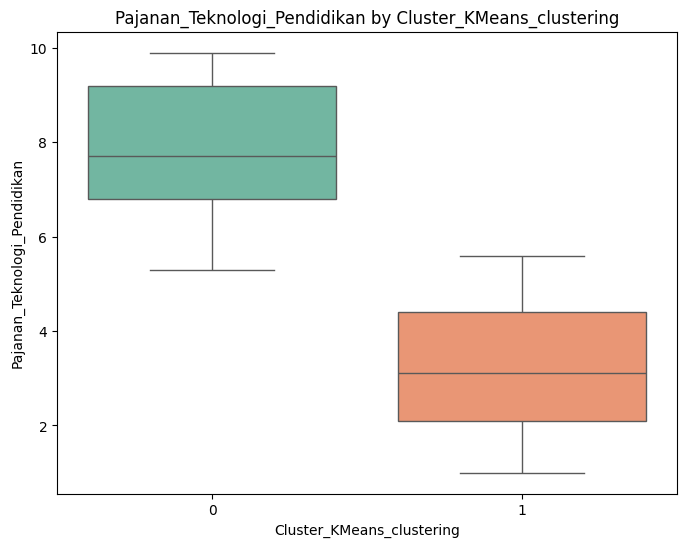

/tmp/ipython-input-143-681056067.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cluster_column, y=var, data=df, palette='Set2')


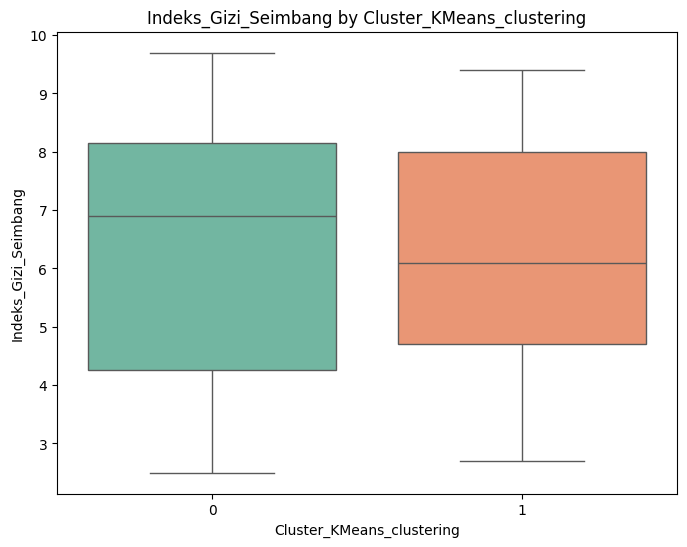

/tmp/ipython-input-143-681056067.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cluster_column, y=var, data=df, palette='Set2')


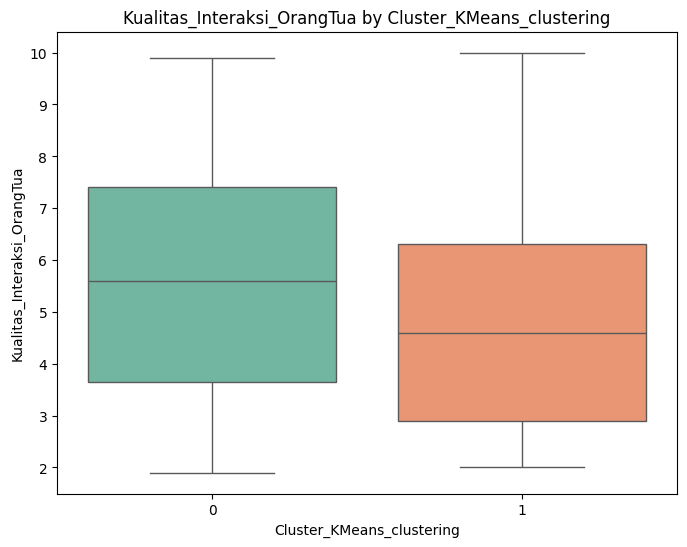

/tmp/ipython-input-143-681056067.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cluster_column, y=var, data=df, palette='Set2')


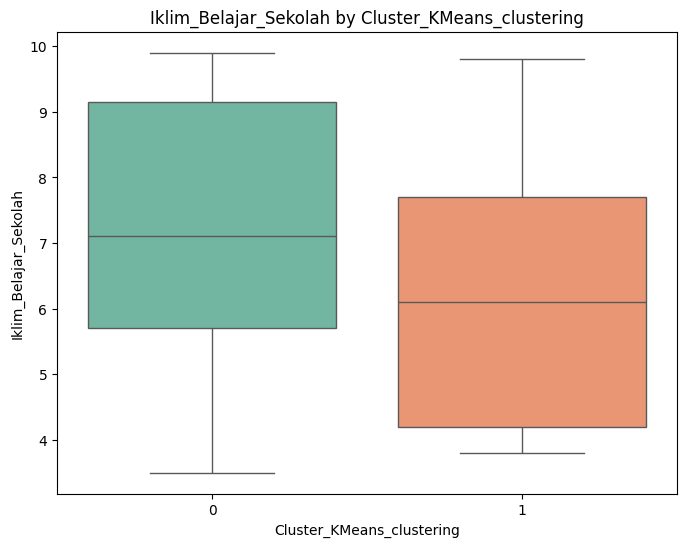

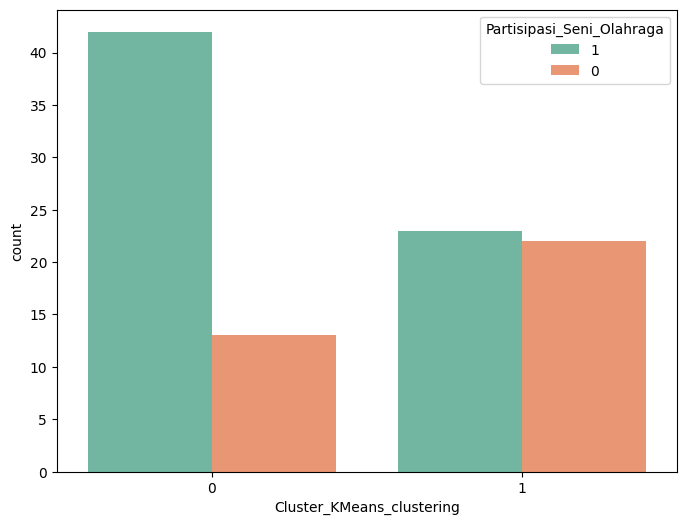

In [144]:
print("\nVisualisasi untuk Klaster Berdasarkan Variabel clustering")
plot_cluster_profiles(df_gabung, 'Cluster_KMeans_clustering', clustering_columns)

### Narasi Cluster

In [145]:
def generate_cluster_summary_numerical(df, cluster_column, variables):
    summary = []
    for cluster, group in df.groupby(cluster_column):
        desc = group[variables].mean().to_dict()
        summary.append(f"Cluster {cluster}: {desc}")
    return "\n".join(summary)

In [146]:
def generate_cluster_summary_categorical(df, cluster_column, variables):
    summary = []
    for cluster, group in df.groupby(cluster_column):
        desc = group[variables].value_counts().to_dict()
        # tampilkan banyak frequency tiap kategori
        summary.append(f"Cluster {cluster}: {desc}")
    return "\n".join(summary)

In [147]:
print("\nRingkasan untuk Klaster Variabel clustering")
print(generate_cluster_summary_numerical(df_gabung, 'Cluster_KMeans_clustering', numerical_columns_clustering))


Ringkasan untuk Klaster Variabel clustering
Cluster 0: {'Pajanan_Teknologi_Pendidikan': 7.834545454545455, 'Indeks_Gizi_Seimbang': 6.487272727272727, 'Kualitas_Interaksi_OrangTua': 5.72, 'Iklim_Belajar_Sekolah': 7.245454545454545}
Cluster 1: {'Pajanan_Teknologi_Pendidikan': 3.128888888888889, 'Indeks_Gizi_Seimbang': 6.29111111111111, 'Kualitas_Interaksi_OrangTua': 5.037777777777778, 'Iklim_Belajar_Sekolah': 6.193333333333333}


In [148]:
print("\nRingkasan untuk Klaster Variabel clustering")
print(generate_cluster_summary_categorical(df_gabung, 'Cluster_KMeans_clustering', categorical_columns_clustering))


Ringkasan untuk Klaster Variabel clustering
Cluster 0: {('1',): 42, ('0',): 13}
Cluster 1: {('1',): 23, ('0',): 22}


In [ ]:
# simpan df_gabung
df_gabung.to_csv(PATH+"/df_gabung.csv")